In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1: Load Data

In [2]:
Golbal_data = pd.read_csv('time_series_covid19_confirmed_global.csv')
Golbal_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161


In [3]:
Canada = Golbal_data[Golbal_data['Country/Region'] == 'Canada']
Canada

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
39,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,63023,64851,66730,68566,70301,72028,73488,75054,76792,78382
40,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,35422,36132,36132,36132,38152,38718,39337,40060,40797,40797
41,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,17751,18069,18423,18806,19131,19376,19655,19947,20392,20750
44,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,520,528,530,534,536,541,542,546,554,555
45,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,340,343,347,351,351,352,353,354,355,358
46,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,20,20
47,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,1343,1358,1364,1368,1376,1383,1389,1393,1402,1409
48,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,198,206,214,216,219,220,229,229,245,247


# Part 2: Data Visualization 

### Choose Ontario to analyze

In [4]:
Ontario = Canada[Canada['Province/State'] == 'Ontario']
Ontario

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
49,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,125233,127130,128997,130962,132736,134605,136599,138529,140320,142171


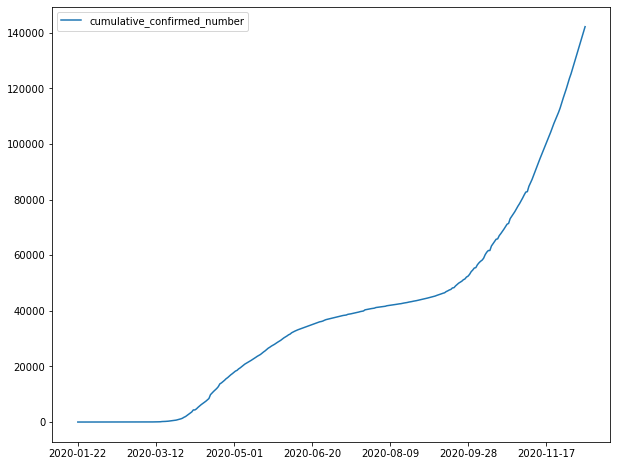

In [5]:
# show ON Cumulative Confirmed Number
ON_cases = Ontario.transpose().iloc[4:]
ON_cases.columns = ['cumulative_confirmed_number']
ON_cases.index = pd.to_datetime(ON_cases.index, format = '%m/%d/%y').strftime('%Y-%m-%d')
ON_cases.plot(figsize=(10,8))

<ipython-input-6-fa2d44a99a03>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  bar.figure.show()


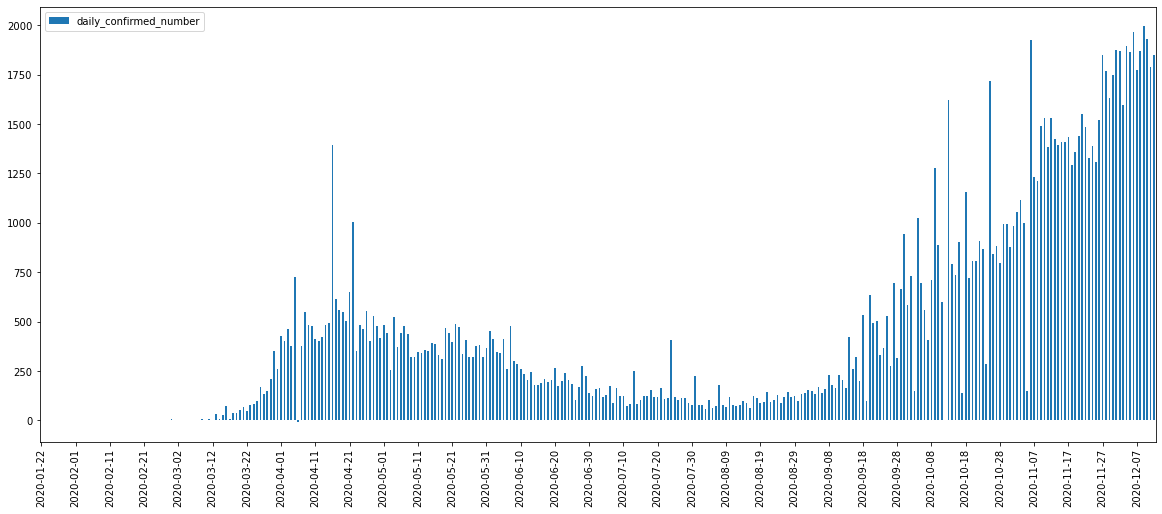

In [6]:
# show ON Daily Confirmed Number

interval = 10

Daily = ON_cases.diff(axis=0)
Daily.columns = ['daily_confirmed_number']
bar = Daily.plot(kind='bar', figsize=(20,8))
axis = bar.xaxis.get_ticklocs()
labels = [l.get_text() for l in bar.xaxis.get_ticklabels()]
labels
bar.xaxis.set_ticks(axis[::interval])
bar.xaxis.set_ticklabels(labels[::interval])
bar.figure.show()

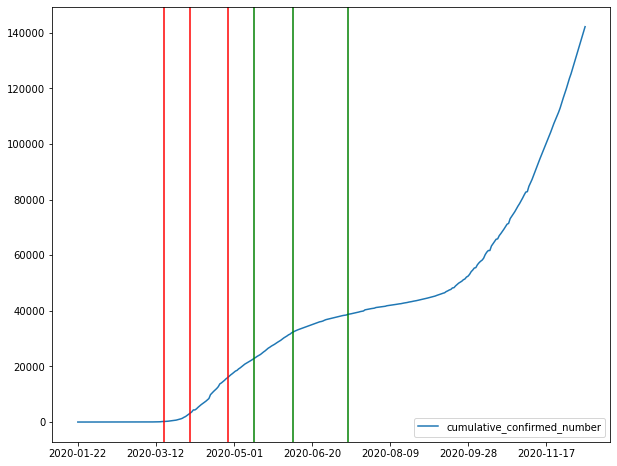

In [7]:
# News Source: https://news.ontario.ca/search/en

emergencydecleration = '2020-03-17'
increasehealthcap = '2020-04-03'
reopenplan = '2020-04-27'
reopen_stage1 = '2020-05-14'
reopen_stage2 = '2020-06-08'
reopen_stage3 = '2020-07-13'

fig, bar = plt.subplots(figsize=(10,8))

ON_cases.plot(ax=bar)
bar.axvline(ON_cases.index.searchsorted(emergencydecleration),color="red")
bar.axvline(ON_cases.index.searchsorted(increasehealthcap),color="red")
bar.axvline(ON_cases.index.searchsorted(reopenplan),color="red")
bar.axvline(ON_cases.index.searchsorted(reopen_stage1),color="green")
bar.axvline(ON_cases.index.searchsorted(reopen_stage2),color="green")
bar.axvline(ON_cases.index.searchsorted(reopen_stage3),color="green")

# Part 3: ARIMA Time Series Model Analysis

In [8]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools

In [9]:
Daily.index = pd.to_datetime(Daily.index)
Daily.daily_confirmed_number = Daily.daily_confirmed_number.astype(float)
Daily.isna().sum()

daily_confirmed_number    1
dtype: int64

In [10]:
# analysis start from 2020-01-23
Daily = Daily.loc['2020-01-23':]

best_df = Daily.loc['2020-05-15':'2020-08-31']
between_df = Daily.loc[:'2020-05-14']
worst_df = Daily.loc['2020-09-01':]

According to the plot of Ontario cumulative confirmed number, I decided to divide the whole time series in 3 parts to represent 3 cases: best case, worst case and the case between best and worst. The part with steeper slope represents higher daily increase confirmed number. Hence, based on the slope of the curve, best case would start from 2020-05-15 to 2020-08-31 with the relatively flat curve, worst case would start from 2020-09-01 to the end date with the relatively Steeper curve, and the case between best and worst would start from 2020-01-23 to 2020-05-14. 

In [11]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

def best_ARIMA(cases):
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

                results = mod.fit()

                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue

### Best Case

In [12]:
# choose best ARIMA from best case dataframe
best_ARIMA(best_df)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1480.772139925269
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1243.2581993046333
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1156.502702150332
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1013.2749759483265
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1128.552532930922
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1075.6478007140524
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1024.0136169038678
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1004.042345170045
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1373.2839556373215
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1178.4787778911032
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1141.8113261338647
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:987.8764397263642
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1128.7241932960417
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1064.68659558802
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1011.0884675800366
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:989.5284553762535
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1229.730330197509
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1089.0055050231458
A

In [13]:
# choose ARIMA(0,1,1)(1,1,1,12) because this model has the lowest AIC

best_mod = sm.tsa.statespace.SARIMAX(best_df,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

best_results = best_mod.fit()

print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7397      0.080     -9.225      0.000      -0.897      -0.583
ar.S.L12      -0.0684      0.075     -0.910      0.363      -0.216       0.079
ma.S.L12      -1.0000      0.070    -14.220      0.000      -1.138      -0.862
sigma2      3228.6753   2.18e-05   1.48e+08      0.000    3228.675    3228.675


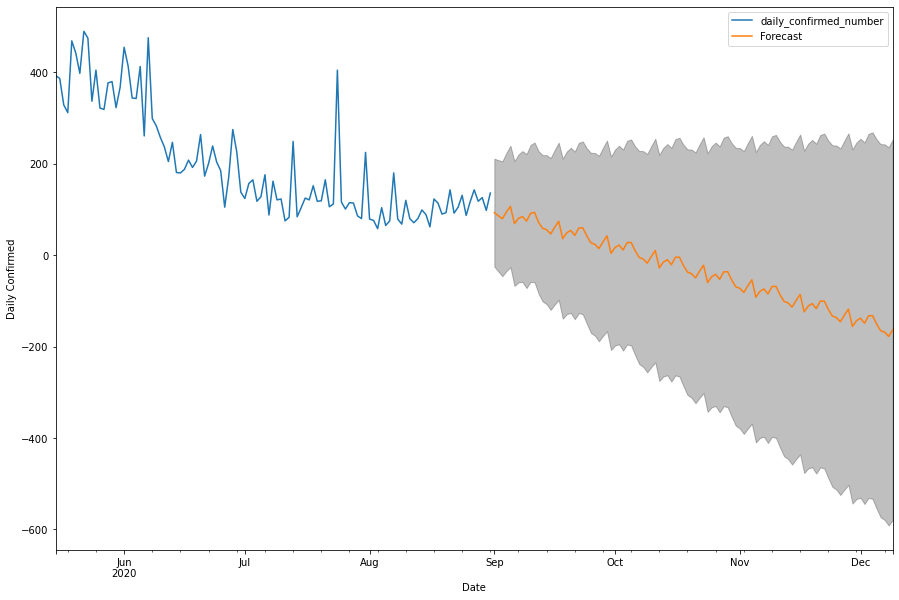

In [14]:
# Get forecast 100 steps ahead in future
pred_uc = best_results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = best_df.plot(label='observed', figsize=(15, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Confirmed')

plt.legend()
plt.show()

From the forecasting projection of Best Case, the daily confirmed cases would keep decreasing in the next 3 months even it would decrease to minus number, which means there is no people would be infected by Covid 19.

### Between Case

In [15]:
# choose best ARIMA from between case dataframe
best_ARIMA(between_df)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1617.1226972339214
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1399.1400983647702
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1360.5238366146732
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1210.3338842444546
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1370.6469485518342
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1359.569101566733
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1223.1682953472923
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1212.0508563836042
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1540.7192391447397
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1361.9059096364908
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1342.3976724336078
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1187.6469104434536
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1361.1811650922054
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1337.9929714797318
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1214.7342396840636
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1189.4324140070466
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1455.4895029218221
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1311.6361148

In [16]:
# choose ARIMA(0,1,1)(0,1,1,12) because this model has the lowest AIC

between_mod = sm.tsa.statespace.SARIMAX(between_df,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

between_results = between_mod.fit()

print(between_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7170      0.059    -12.081      0.000      -0.833      -0.601
ma.S.L12      -1.0000      0.053    -19.028      0.000      -1.103      -0.897
sigma2      2.038e+04   2.58e-06    7.9e+09      0.000    2.04e+04    2.04e+04


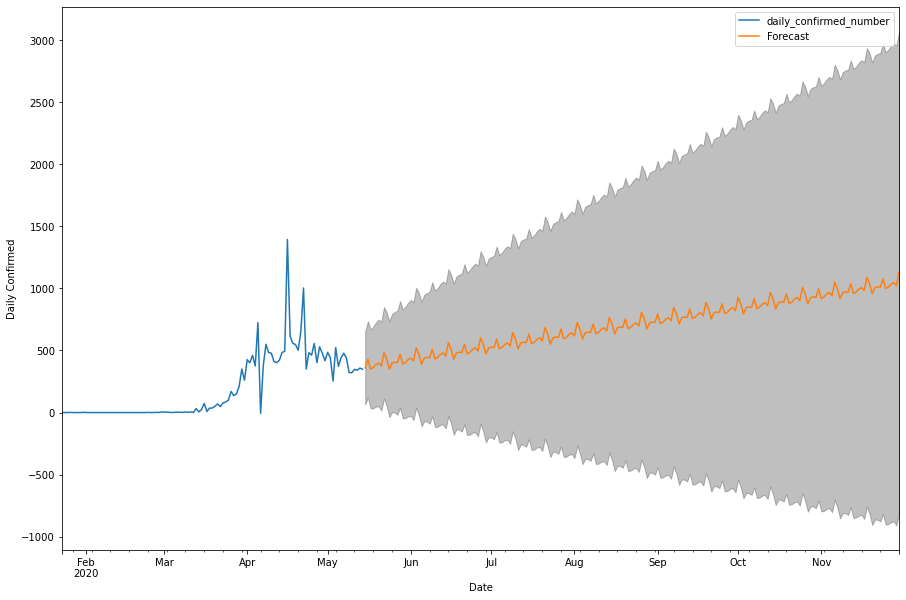

In [17]:
# Get forecast 200 steps ahead in future
pred_uc_bet = between_results.get_forecast(steps=200)

# Get confidence intervals of forecasts
pred_ci_bet = pred_uc_bet.conf_int()

ax_bet = between_df.plot(label='observed', figsize=(15, 10))
pred_uc_bet.predicted_mean.plot(ax=ax_bet, label='Forecast')
ax_bet.fill_between(pred_ci_bet.index,
                pred_ci_bet.iloc[:, 0],
                pred_ci_bet.iloc[:, 1], color='k', alpha=.25)
ax_bet.set_xlabel('Date')
ax_bet.set_ylabel('Daily Confirmed')

plt.legend()
plt.show()

From the forecasting projection of the Case between Best and Worst, the daily confirmed cases would keep slightly increasing in the future time, and the daily confirmed number would be around 500.

### Worst Case

In [18]:
# # choose best ARIMA from worst case dataframe
best_ARIMA(worst_df)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1724.988196336538
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1467.6950110078137
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1334.7221043637007
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1165.517490075142
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1336.3421841515585
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1316.6048497036995
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1180.1829076658987
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1159.928087860173
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1633.1494296721353
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.658553306645
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1318.3018677079035
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1149.9352718103546
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1338.332385140036
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1303.7731245829045
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1178.4568974336942
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1147.2849888795038
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1505.8790606324746
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1327.72462137765

In [19]:
# choose ARIMA(1,1,1)(0,1,1,12) because this model has the lowest AIC

worst_mod = sm.tsa.statespace.SARIMAX(worst_df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

worst_results = worst_mod.fit()

print(worst_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2703      0.111     -2.435      0.015      -0.488      -0.053
ma.L1         -1.0897      0.091    -11.986      0.000      -1.268      -0.912
ma.S.L12      -1.0006      0.183     -5.477      0.000      -1.359      -0.643
sigma2      6.089e+04      3e-06   2.03e+10      0.000    6.09e+04    6.09e+04


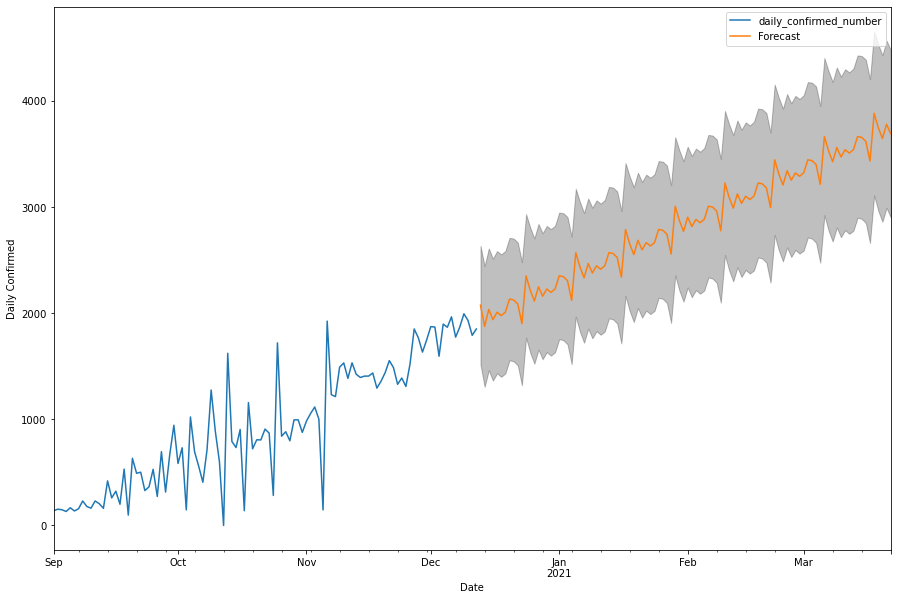

In [20]:
# Get forecast 100 steps ahead in future
pred_uc_worst = worst_results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci_worst = pred_uc_worst.conf_int()

ax_worst = worst_df.plot(label='observed', figsize=(15, 10))
pred_uc_worst.predicted_mean.plot(ax=ax_worst, label='Forecast')
ax_worst.fill_between(pred_ci_worst.index,
                pred_ci_worst.iloc[:, 0],
                pred_ci_worst.iloc[:, 1], color='k', alpha=.25)
ax_worst.set_xlabel('Date')
ax_worst.set_ylabel('Daily Confirmed')

plt.legend()
plt.show()

From the forecasting projection of the Worst Case, the daily confirmed cases would keep rapidly increasing in the next 3 months. The epidemic will be difficult to control because 1,000 new cases are added to the original in every month, and the daily confirmed cases would arrive 3000 in March, 2021. 

# Part 4: Relating COVID-19 Projections to a Second Dataset

First, I choose the Canada public data from Kaggle that captures from January to March to explore factors. This time period represents the early outbreak in Canada. Similarly, I would focus on Ontario as what I did above.

In [21]:
# Source: https://www.kaggle.com/zinx1991/covid19-in-canada
Canada_Public = pd.read_csv('Public_COVID-19_Canada .csv')
del Canada_Public['case_id']
Canada_Public.head()

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired
0,1.0,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN
1,2.0,50-59,Female,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1,China,NaN
2,1.0,40-49,Male,Vancouver Coastal,BC,Canada,28-01-2020,26-01-2020,1,China,NaN
3,3.0,20-29,Female,Middlesex-London,Ontario,Canada,31-01-2020,26-01-2020,1,China,NaN
4,2.0,50-59,Female,Vancouver Coastal,BC,Canada,04-02-2020,02-02-2020,0,NaN,Close Contact


In [22]:
ON_Public = Canada_Public[Canada_Public['province'] == 'Ontario']

# I choos to explore how travel affect the pandemic
Travel_Info = ON_Public[ON_Public['travel_yn'] != 'Not Reported']
Travel_Info.head()

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired
0,1.0,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN
1,2.0,50-59,Female,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1,China,NaN
3,3.0,20-29,Female,Middlesex-London,Ontario,Canada,31-01-2020,26-01-2020,1,China,NaN
9,4.0,20-29,Female,Toronto,Ontario,Canada,23-02-2020,23-02-2020,1,China,NaN
10,5.0,60-69,Female,Toronto,Ontario,Canada,26-02-2020,23-02-2020,1,Iran,NaN


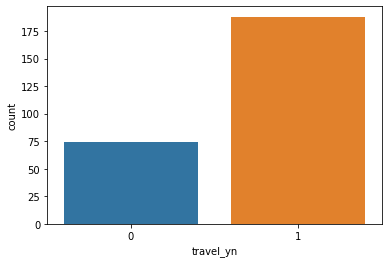

In [23]:
sns.countplot('travel_yn', data=Travel_Info)

From the plot, most of confirmed cases have travel history in the early outbreak in Canada.

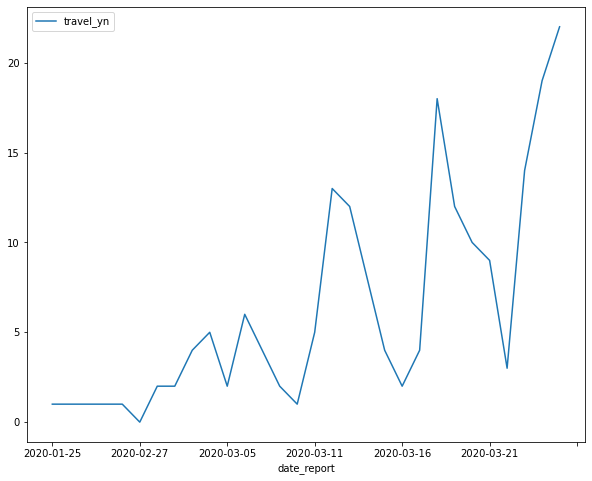

In [24]:
# construct the time series of daily confirmed cases
Travel_Info['travel_yn'] = pd.to_numeric(Travel_Info['travel_yn'])
date_travel = Travel_Info[['date_report', 'travel_yn']]
date_group = date_travel.groupby('date_report').sum()
date_group.index = pd.to_datetime(date_group.index, format = '%d-%m-%Y').strftime('%Y-%m-%d')
date_group = date_group.sort_values(by = 'date_report')
date_group.plot(figsize=(10,8))

In [25]:
best_ARIMA(date_group)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:210.50162124753118
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:130.3518876895339
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:118.60330991805255
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:33.701086792993934
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:119.59132030173046
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:114.62367104701319
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:38.035340804541235
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:34.58169126759948
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:183.95665005493277
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:114.57742491133284
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:108.78904839382287
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:28.57659299890597
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:119.82527711565915
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:110.61527562167444
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:39.846022821949056
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:29.448661347359423
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:166.94427474662612
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:103.7901230934

In [26]:
p4_mod = sm.tsa.statespace.SARIMAX(date_group,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

p4_results = p4_mod.fit()

print(p4_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8342      3.702     -0.225      0.822      -8.091       6.422
ma.L1         -0.5894      0.126     -4.692      0.000      -0.836      -0.343
ma.S.L12       0.2676      0.222      1.206      0.228      -0.167       0.702
sigma2         0.0171      7.713      0.002      0.998     -15.099      15.134


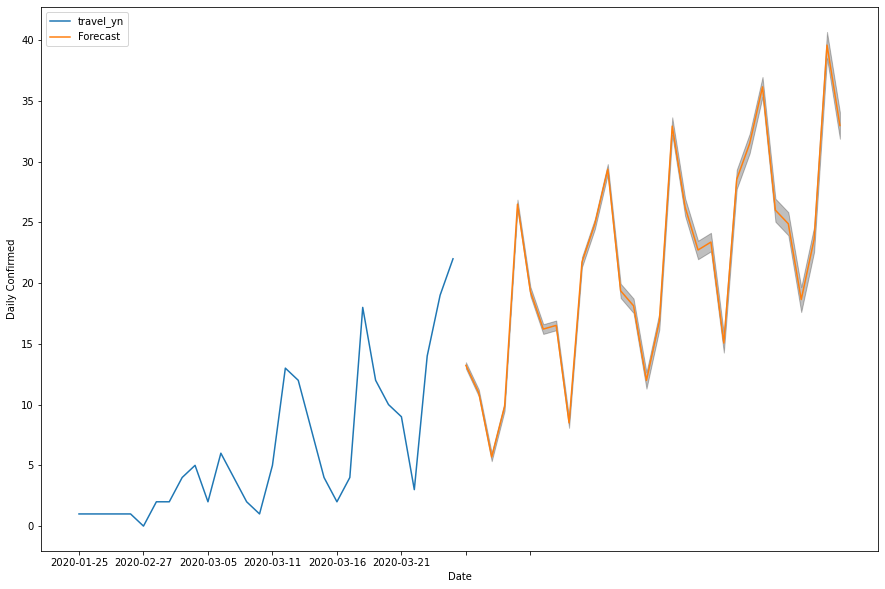

In [27]:
# Get forecast 30 steps ahead in future
p4_pred_uc = p4_results.get_forecast(steps=30)

# Get confidence intervals of forecasts
p4_pred_ci = p4_pred_uc.conf_int()

p4_ax = date_group.plot(label='observed', figsize=(15, 10))
p4_pred_uc.predicted_mean.plot(ax=p4_ax, label='Forecast')
p4_ax.fill_between(p4_pred_ci.index,
                p4_pred_ci.iloc[:, 0],
                p4_pred_ci.iloc[:, 1], color='k', alpha=.25)
p4_ax.set_xlabel('Date')
p4_ax.set_ylabel('Daily Confirmed')

plt.legend()
plt.show()

From the forecasting projection, the trend of daily confirmed cases would keep increasing. In addition, based on the curve representing the Ontario cumulative confirmed cases, I noticed that the curve also has upward trend, which indicates that the travelling of people would affect the outbreak. The dataset I used to was mainly focus on the cases came from overseas, I think once the people travel too much travel would make the epidemic worseTherefore, I decide to find a more complete dataset from the government website about the passengers transportation in Canada.

In [28]:
# Source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310026901&cubeTimeFrame.startMonth=03&cubeTimeFrame.startYear=2020&cubeTimeFrame.endMonth=10&cubeTimeFrame.endYear=2020&referencePeriods=20200301%2C20201001
Canada_Transport = pd.read_csv('Canada_Transportation.csv')
Canada_Transport.head()

,REF_DATE,GEO,DGUID,Activity indicators,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-03,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,2848.0,NaN,NaN,NaN,0
1,2020-04,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,203.0,NaN,NaN,NaN,0
2,2020-05,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,241.0,NaN,NaN,NaN,0
3,2020-06,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,312.0,NaN,NaN,NaN,0
4,2020-07,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,347.0,NaN,NaN,NaN,0


In [29]:
# Extract all rows with 'passengers'
P4_df = Canada_Transport[(Canada_Transport['Activity indicators'] == 'International passengers, number of Canadian and U.S. travellers between Canada and the United States') |
                         (Canada_Transport['Activity indicators'] == 'International passengers, number of Canadian and non-U.S. travellers overseas, all modes of transport') |
                         (Canada_Transport['Activity indicators'] == 'Domestic and international passengers, air') |
                         (Canada_Transport['Activity indicators'] == 'Domestic and international passengers, rail (VIA Rail)')]
P4_df.head()

,REF_DATE,GEO,DGUID,Activity indicators,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-03,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,2848.0,NaN,NaN,NaN,0
1,2020-04,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,203.0,NaN,NaN,NaN,0
2,2020-05,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,241.0,NaN,NaN,NaN,0
3,2020-06,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,312.0,NaN,NaN,NaN,0
4,2020-07,Canada,2016A000011124,"International passengers, number of Canadian a...",Number,223,thousands,3,v1061874463,1.1,347.0,NaN,NaN,NaN,0


           VALUE
REF_DATE        
2020-04    472.0
2020-05    568.0
2020-06    909.0
2020-07   1459.0
2020-09   1622.0
2020-08   1804.0
2020-03   7420.0


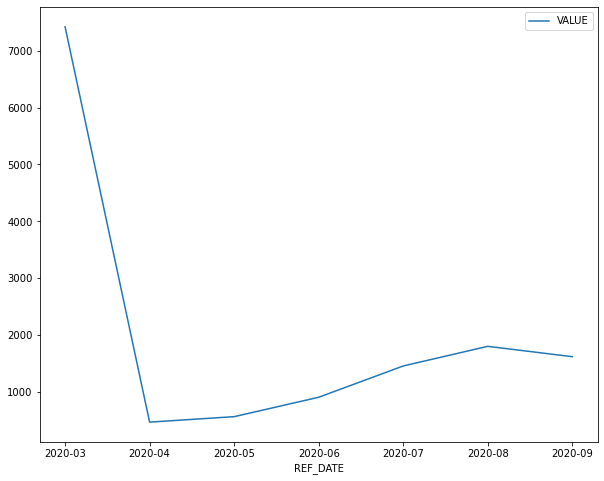

In [30]:
dates_values = P4_df[['REF_DATE', 'VALUE']]
ts = dates_values.groupby('REF_DATE').sum()
print(ts.sort_values(by = 'VALUE'))
ts.plot(figsize=(10,8))

Obviously, after March, the number travel decreased. However, from the table, the number of travel in July, August and September increased to almost 2,000,000 times.

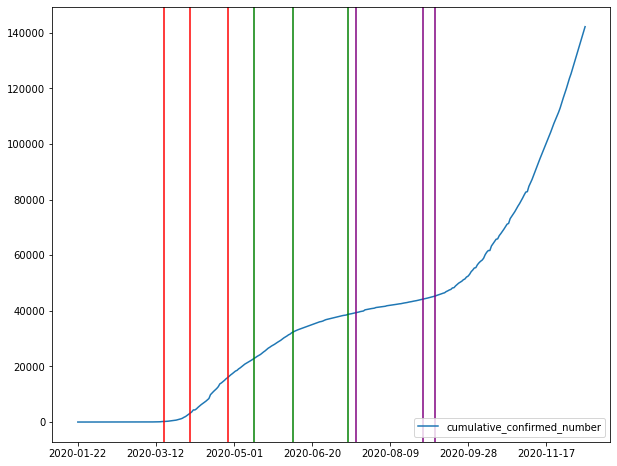

In [31]:
HighVolumeDate1 = '2020-07-18' # after stage 3
HighVolumeDate2 = '2020-08-30' # prepare back to school
HighVolumeDate3 = '2020-09-07' # canada labour day

fig, bar = plt.subplots(figsize=(10,8))

ON_cases.plot(ax=bar)
bar.axvline(ON_cases.index.searchsorted(emergencydecleration),color="red")
bar.axvline(ON_cases.index.searchsorted(increasehealthcap),color="red")
bar.axvline(ON_cases.index.searchsorted(reopenplan),color="red")
bar.axvline(ON_cases.index.searchsorted(reopen_stage1),color="green")
bar.axvline(ON_cases.index.searchsorted(reopen_stage2),color="green")
bar.axvline(ON_cases.index.searchsorted(reopen_stage3),color="green")

bar.axvline(ON_cases.index.searchsorted(HighVolumeDate1),color="purple")
bar.axvline(ON_cases.index.searchsorted(HighVolumeDate2),color="purple")
bar.axvline(ON_cases.index.searchsorted(HighVolumeDate3),color="purple")

As I projected the three dates that had high volume of transportation, I found that each high volume travel followed by a high number of confirmed cases as few days after the dates, the curve become more steeper with high daily confirmed number. And I believe too much travel do affect the confirmed numbers. And it is necessary to take action to reduce the people travelling frequency in daily life.

# Part 5：Insights about policy and guidance to tackle the outbreak 

First, based on Part 3, I think the lockdown policy can effectively control the spread of covid 19 because the prediction for Best Case shows that the confirmed cases will decrease to 0 as the number keep decreasing. Hence, the lockdown policy could be the way that keep applying.

Second, according to my finding on the dataset for early outbreak in Canada from Part 4, most confirmed cases came from overseas. Hence, the government could strictly control immigration policy as well as do more inspection measures at the border, such as examination and isolation of outsiders. At the same time, the government should supervise staff to protect themselves provide more protection resources to border workers to protect their health. More importantly, government shou supervise outsiders to take self-isolation measures for 14 days.

Third, for the domestic situation, it is necessary to introduce policies to reduce people’s travel, especially during holidays. For example, reducing the frequency and running time of public transportation and customer capacity of merchants. Furthermore, the government could carry out a thorough lockdown policy if necessary.